Mount Google Drive



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Unzip dataset

In [2]:
!unzip /content/drive/MyDrive/dataset/Parking.v1i.tensorflow.zip > /dev/null

Import neccessary package

In [3]:
import cv2
import os
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

Read image annotations from csv file to pandas DataFrame

In [4]:
req_images = pd.read_csv('train/_annotations.csv')
req_images.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,2013-03-17_17_15_13_jpg.rf.63df560223c410618de...,416,416,space-empty,197,304,252,378
1,2013-03-17_17_15_13_jpg.rf.63df560223c410618de...,416,416,space-empty,176,254,226,312
2,2013-03-17_17_15_13_jpg.rf.63df560223c410618de...,416,416,space-empty,159,212,203,264
3,2013-03-17_17_15_13_jpg.rf.63df560223c410618de...,416,416,space-empty,145,175,186,223
4,2013-03-17_17_15_13_jpg.rf.63df560223c410618de...,416,416,space-empty,133,146,170,183


In [5]:
req_images.info

<bound method DataFrame.info of                                                  filename  width  height  \
0       2013-03-17_17_15_13_jpg.rf.63df560223c410618de...    416     416   
1       2013-03-17_17_15_13_jpg.rf.63df560223c410618de...    416     416   
2       2013-03-17_17_15_13_jpg.rf.63df560223c410618de...    416     416   
3       2013-03-17_17_15_13_jpg.rf.63df560223c410618de...    416     416   
4       2013-03-17_17_15_13_jpg.rf.63df560223c410618de...    416     416   
...                                                   ...    ...     ...   
114635  2013-04-11_16_10_11_jpg.rf.c85127c29a8ec5f834d...    416     416   
114636  2013-04-11_16_10_11_jpg.rf.c85127c29a8ec5f834d...    416     416   
114637  2013-04-11_16_10_11_jpg.rf.c85127c29a8ec5f834d...    416     416   
114638  2013-04-11_16_10_11_jpg.rf.c85127c29a8ec5f834d...    416     416   
114639  2013-04-11_16_10_11_jpg.rf.c85127c29a8ec5f834d...    416     416   

                 class  xmin  ymin  xmax  ymax  
0     

Create a list for filenames (images) that not duplicated

In [6]:
list_filename = []
for filename in req_images['filename']:
  if 'train/'+filename not in list_filename:
    list_filename.append('train/'+filename)

print("filename not duplicated: {}".format(len(list_filename)))
list_filename[:5]

filename not duplicated: 2866


['train/2013-03-17_17_15_13_jpg.rf.63df560223c410618de6b0580e15b7af.jpg',
 'train/2013-03-14_07_20_01_jpg.rf.63e1888020c2c91aed26867135f16010.jpg',
 'train/2013-03-19_09_40_04_jpg.rf.647991c051ccf1114b68d53277e89840.jpg',
 'train/2013-03-14_14_36_02_jpg.rf.64417b42b58835958e3f70a1563c61f4.jpg',
 'train/2013-04-14_15_20_10_jpg.rf.63ef331a6e5fd06436272b8d6e64e449.jpg']

Generate image

In [ ]:
def generate_images(list_filename):
    
    images = []
   
    for index, element in enumerate(list_filename):
      path = element
      input_image = cv2.imread(path)
      input_image = cv2.resize(input_image, (96,96))
      images.append(input_image)
    
    images = np.array(images)
    print('images_shape:',images.shape)
    source_images = list_filename
    return images, source_images

model_input_images, source_images = generate_images(list_filename)
len(model_input_images)

images_shape: (2866, 96, 96, 3)


Scaling ratio for light dataflow

In [ ]:
req_images['width_ratio'] = req_images['width']/96
req_images['height_ratio'] = req_images['height']/96
req_images['xmin'] = req_images['xmin']/req_images['width_ratio']
req_images['xmax'] = req_images['xmax']/req_images['width_ratio']
req_images['ymin'] = req_images['ymin']/req_images['height_ratio']
req_images['ymax'] = req_images['ymax']/req_images['height_ratio']

Create a list of keypoints (bounding boxes) for further model training

In [ ]:
list1 = [req_images['xmin'][0], req_images['xmax'][0], req_images['ymin'][0], req_images['ymax'][0]]
list1 = [int(x) / 96 for x in list1]
list1 = [list1]*2866
list1 = np.array(list1, dtype='float32')
list1

array([[0.46875  , 0.6041667, 0.7291667, 0.90625  ],
       [0.46875  , 0.6041667, 0.7291667, 0.90625  ],
       [0.46875  , 0.6041667, 0.7291667, 0.90625  ],
       ...,
       [0.46875  , 0.6041667, 0.7291667, 0.90625  ],
       [0.46875  , 0.6041667, 0.7291667, 0.90625  ],
       [0.46875  , 0.6041667, 0.7291667, 0.90625  ]], dtype=float32)

Generate keypoints

In [ ]:
def generate_keypoints():

  req_image = req_images.reset_index()
  keypoint_features = []
  for index, image in enumerate(source_images):
    try:
      image_name = image
      #print(image_name)
      mask = req_image.iloc[[index]]
      mask = mask.values.tolist()
      #print(index)
      #print(mask)
      keypoints = (mask[0][5:9])
      #print(keypoints)
      newList = [int(x) / 96 for x in keypoints]
      #print(newList)
      keypoint_features.append(newList)
    except:
      print('error !')
      break
  keypoint_features = np.array(keypoint_features, dtype='float32')    
  return keypoint_features

In [ ]:
model_input_keypoints = generate_keypoints()

In [ ]:
print(len(model_input_keypoints))
print(model_input_keypoints[:40])

In [ ]:
#from itertools import chain

In [ ]:
#train_input = list(chain(*model_input_keypoints))
#range_list = len(train_input)/(160)
#new_train_ann = []
#for i in range(int(range_list)):
#  new_train_ann.append(train_input[i:i+160])
#  i += 160

#new_train_ann = np.array(new_train_ann, dtype=float)
#print(len(new_train_ann))
#print(new_train_ann[0])

Check bounding boxes

In [ ]:
from PIL import Image

In [ ]:
im = model_input_images[0]
hm = Image.fromarray(im)
hm.save("yourfile.jpg")

In [ ]:
list_spaces = model_input_keypoints[0:40]*96
list_spaces

array([[45., 70., 58., 87.],
       [40., 58., 52., 72.],
       [36., 48., 46., 60.],
       [33., 40., 42., 51.],
       [30., 33., 39., 42.],
       [28., 26., 37., 35.],
       [25., 21., 33., 28.],
       [23., 15., 30., 22.],
       [22., 11., 29., 17.],
       [21.,  6., 27., 12.],
       [54., 63., 64., 76.],
       [47., 53., 58., 64.],
       [45., 43., 54., 53.],
       [40., 35., 50., 44.],
       [38., 28., 47., 36.],
       [35., 22., 44., 30.],
       [33., 17., 40., 24.],
       [30., 11., 38., 19.],
       [28.,  8., 35., 14.],
       [26.,  4., 33., 10.],
       [81., 45., 88., 56.],
       [75., 36., 81., 46.],
       [70., 29., 76., 40.],
       [64., 24., 70., 33.],
       [60., 18., 66., 27.],
       [57., 13., 62., 22.],
       [53.,  9., 58., 17.],
       [50.,  6., 55., 14.],
       [47.,  1., 52., 10.],
       [85., 39., 94., 48.],
       [80., 30., 87., 39.],
       [74., 24., 82., 32.],
       [69., 18., 77., 25.],
       [65., 14., 71., 20.],
       [61.,  

In [ ]:
xBox = []
yBox = []
for i in list_spaces:
  (startX, endX) = int(i[0]), int(i[1])
  (startY, endY) = int(i[2]), int(i[3])
  xBox.append((startX, endX))
  yBox.append((startY, endY))

print(xBox[:5])
print(yBox[:5])

[(45, 70), (40, 58), (36, 48), (33, 40), (30, 33)]
[(58, 87), (52, 72), (46, 60), (42, 51), (39, 42)]


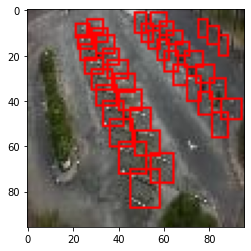

In [ ]:
image = cv2.imread('yourfile.jpg')
for axis, boxes in enumerate(list_spaces):
  out = cv2.rectangle(image, xBox[axis], yBox[axis], (255,0,0), 1)
plt.imshow(out)

Regression Bounding Box model training

In [ ]:
import tensorflow as tf

In [ ]:
input_shape = (96,96,3)
no_of_keypoints = 4  #xmin, ymin, xmax, ymax all in images

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), padding='same', use_bias=False, activation='relu', input_shape=input_shape),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(32, (3,3), padding='same', use_bias=False, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2,2),

  tf.keras.layers.Conv2D(64, (3,3), padding='same', use_bias=False, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(64, (3,3), padding='same', use_bias=False, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2,2),

  tf.keras.layers.Conv2D(96, (3,3), padding='same', use_bias=False, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(96, (3,3), padding='same', use_bias=False, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2,2),

  tf.keras.layers.Conv2D(128, (3,3), padding='same', use_bias=False, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(128, (3,3), padding='same', use_bias=False, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2,2),

  tf.keras.layers.Conv2D(256, (3,3), padding='same', use_bias=False, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(256, (3,3), padding='same', use_bias=False, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2,2),

  tf.keras.layers.Conv2D(512, (3,3), padding='same', use_bias=False, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(512, (3,3), padding='same', use_bias=False, activation='relu'),
  tf.keras.layers.BatchNormalization(),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='linear'),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(no_of_keypoints)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 96, 96, 32)        864       
                                                                 
 batch_normalization (BatchN  (None, 96, 96, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 32)        9216      
                                                                 
 batch_normalization_1 (Batc  (None, 96, 96, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 32)       0         
 )                                                               
                                                        

In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
earlyStopping = EarlyStopping(monitor='loss', patience=30, mode='min', baseline=None)
rlp = ReduceLROnPlateau(monitor='val_loss', factor=0.7, patience=5, min_lr=1e-15, mode='min', verbose=1)
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])
history = model.fit(model_input_images, list1, epochs=50, batch_size=16, validation_split=0.20, callbacks=[earlyStopping])

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


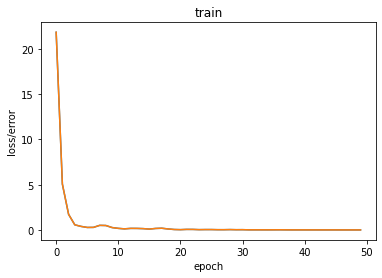

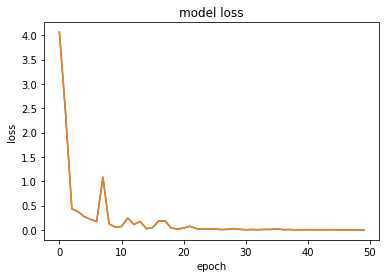

In [ ]:
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['mse'])
plt.title('train')
plt.ylabel('loss/error')
plt.xlabel('epoch')
plt.show()
# summarize history for loss
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_mse'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

Model Testing

In [ ]:
image_test = "/content/test/2013-02-22_07_40_01_jpg.rf.51f844c75c08cbec2dea84c73fcbb9a9.jpg"
test_image = cv2.imread(image_test)
test_image = cv2.resize(test_image,(96,96))
cv2.imwrite('final_test.jpg',test_image)
images = np.array(test_image)/255.0
print(images.shape)
test=np.expand_dims(images,axis=0)
print(test.shape)

ans = model.predict(test)
print(abs(ans))
ans = ans * 96  #denormalizing
print(ans)

(96, 96, 3)
(1, 96, 96, 3)
[[0.43368226 0.6098838  0.70448184 0.89135575]]
[[41.6335   58.548843 67.63026  85.57015 ]]


True

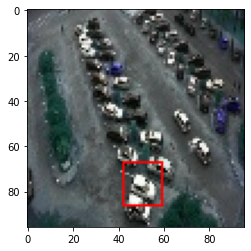

In [ ]:
test_image = cv2.imread('final_test.jpg')
test_image = cv2.resize(test_image,(96,96))
out = cv2.rectangle(test_image, (42, 67), (59, 86), (255,0,0), 1)
plt.imshow(out)
cv2.imwrite('final_test.jpg',out)

In [ ]:
import time
saved_model_path = "./1_bd_detection_{}.h5".format(int(time.time()))

model.save(saved_model_path)